In [ ]:
# installing necessary libraries
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install math
!pip install random

# importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math

---
# Normal Distribution
#### Overview
This code simulates a normal distribution and compares it with the theoretical normal distribution curve. The normal distribution follows the **probability density function (PDF)**:
$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$
where:
- 𝜇 (`Mp`) is the mean of the distribution.
- 𝜎 (`Sd`) is the standard deviation.
- 𝑥 represents the values for which probabilities are computed.

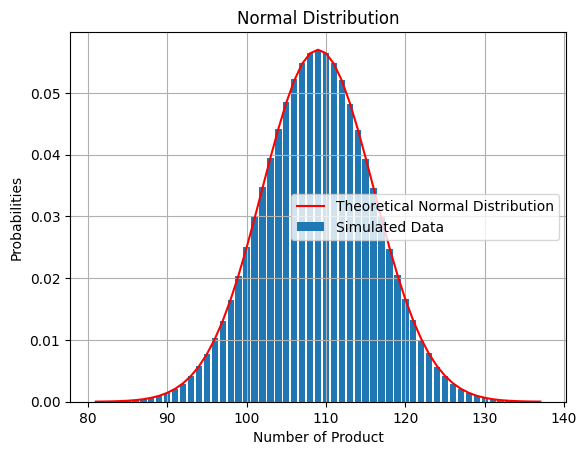

In [ ]:
# Input
Mp = 109 # mean of product
Sd = 7 # standard deviation
Nsim = 900000 # number of simulation

# Equation
def Ndist(num):
  return math.exp((-(num - Mp) ** 2) / (2 * (Sd ** 2))) / (Sd * math.sqrt(2 * math.pi))

# Simulation
x_1b = Mp - (Sd * 4)
x_1t = Mp + (Sd * 4)
x_1 = np.linspace(x_1b, x_1t, Sd * 4 * 2 + 1)

prob = []

for i, item in enumerate(x_1):
  prob += [int(item)] * int(Ndist(item) * 100000)

problen = len(prob)

y_1 = x_1 * 0

for _ in range(Nsim):
  y_1[prob[random.randint(0, problen - 1)] - x_1b] += 1

y_1 /= Nsim # scaling down to fit theoretical shape

plt.bar(x_1, y_1, label = "Simulated Data")


# Theoretical
x_2 = np.linspace(Mp - (Sd * 4), Mp + (Sd * 4), Sd * 4 * 2 + 1)

y_2 = x_2 * 0

for i, item in enumerate(x_2):
  y_2[i] = Ndist(item)

plt.plot(x_2, y_2, 'r', label = "Theoretical Normal Distribution")


# plotting
plt.xlabel("Number of Product Generated")
plt.ylabel("Probabilities")
plt.title("Normal Distribution")
plt.legend()
plt.grid(True)


#### Key Components in the Code
1. Parameter Initialization:
  - `Mp = 109`: Mean of the product distribution.
  - `Sd = 7`: Standard deviation of the distribution.
  - `Nsim = 900000`: Number of simulations.
2. Defining the Probability Density Function (PDF): The function `Ndist(num)` calculates the theoretical probability for a given 𝑥 value using the normal distribution formula.

3. Simulation of Normal Distribution:
  - The range of values is set from `Mp - 4*Sd` to `Mp + 4*Sd`.
  - The probability of each integer in the range is approximated by multiplying the PDF value by 100,000
  - A list prob is created where each integer is repeated according to its probability.
  - Random sampling from prob is performed Nsim times to generate a histogram.

4. Plotting the Results:
  - A bar chart represents the simulated normal distribution.
  - A red curve represents the theoretical normal distribution.

#### Expected Output
- A bell-shaped curve where the simulated histogram aligns closely with the theoretical curve.
- The mean (`Mp`) marks the center of the distribution.
- The spread is controlled by the standard deviation (`Sd`).

---
# Binomial Distribution
#### Overview
This code simulates a binomial distribution and compares it with the theoretical binomial distribution. The binomial distribution models the number of successes in 𝑛 independent trials, each with success probability 𝑝. It follows the **probability mass function (PMF)**:
$$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} $$
where:
- 𝑛 (`Np`) is the total number of trials.
- 𝑘 is the number of successful outcomes.
- 𝑝 (`Sr`) is the probability of success in a single trial.
- $ \binom{n}{k} $ is the binomial coefficient:

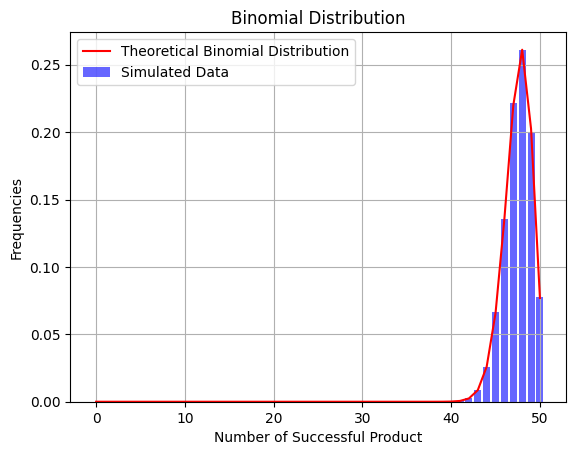

In [ ]:
# Input
Np = 50 # number of product
Sr = 95 # success rate
Nsim = 90000 # number of simulation

# Equation
def Bdist(num):
  return math.comb(Np, num) * (Sr ** num) * ((1 - Sr) ** (Np - num))

# Simulation
Srmult = 1
while Sr - math.floor(Sr) > 0:
  Sr *= 10
  Srmult *= 10

Sr = int(Sr)

prob = [1] * Sr + [0] * ((100 * Srmult) - Sr)
x_1 = np.linspace(0, Np, Np + 1)
y_1 = x_1 * 0

for _ in range(Nsim):
  y_1[sum(prob[random.randint(0, (100 * Srmult) - 1)] for _ in range(Np))] += 1

y_1 /= Nsim # scaling down to fit theoretical shape

plt.bar(x_1, y_1, alpha = 0.6, color='b', label = "Simulated Data")


# Theoretical
x_2 = np.linspace(0, Np, Np + 1)

Sr = Sr / Srmult / 100

y_2 = x_2 * 0

for i in range(len(y_2)):
  y_2[i] = Bdist(i)

plt.plot(x_2, y_2, 'r', label = "Theoretical Binomial Distribution")


# plotting
plt.xlabel("Number of Successful Product")
plt.ylabel("Frequencies")
plt.title("Binomial Distribution")
plt.legend()
plt.grid(True)


#### Key Components in the Code
1. Parameter Initialization:
  - `Np = 50`: Total number of products (trials).
  - `Sr = 95`: Success rate (initially represented as a percentage).
  - `Nsim = 90000`: Number of simulations.

2. Defining the Probability Mass Function (PMF): The function `Bdist(num)` calculates the theoretical probability of exactly num successful products using:
$$ Bdist(k) = \binom{Np}{k} Sr^k (1 - Sr)^{Np - k} $$

3. Simulation of Binomial Distribution:
  - Converts `Sr` from percentage format into a probability by adjusting decimal places.
  - Constructs a probability list (`prob`), where 1 represents success and 0 represents failure.
  - Simulates Nsim trials by summing the number of successes in `Np` trials for each simulation.
  - Stores results in `y_1` and normalizes to match theoretical values.

4. Plotting the Results:
  - A bar chart represents the simulated binomial distribution.
  - A red curve represents the theoretical binomial distribution.

#### Expected Output
- A discrete probability distribution where most values cluster around the expected number of successes $E[X]=np$.
- The shape is approximately symmetric if $p≈0.5$, but skewed otherwise.
- The histogram aligns with the theoretical binomial curve.

---
# Poisson Distribution
#### Overview
This code visualizes the Poisson distribution, which models the probability of a given number of events occurring within a fixed time interval, given a known average rate 𝜆. The Poisson distribution follows the **probability mass function (PMF)**:
$$ P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
 $$

where:
- 𝜆 (Mp) is the expected number of events in a given time period.
- 𝑘 is the actual number of occurrences.
- 𝑒 is Euler's number ($≈2.718$).

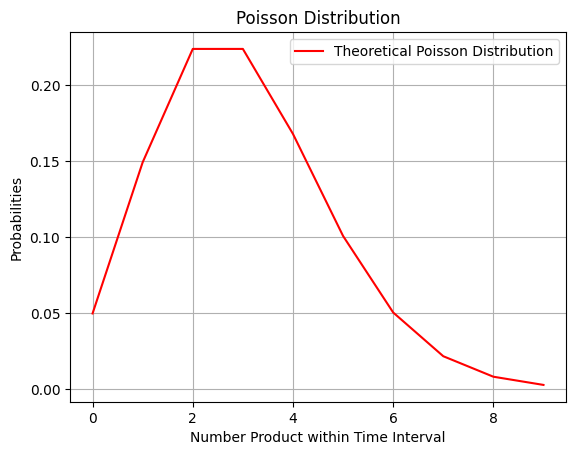

In [ ]:
# Input
Mp = 3 # mean of product
Nsim = 90000 # number of simulation

# Equation
def Pdist(num):
  return (math.exp(-Mp) * Mp ** num) / math.factorial(num)

# Simulation



#Theoretical
x_2 = np.linspace(0, Mp * 3, Mp * 3 + 1)

y_2 = x_2 * 0

for i in range(len(y_2)):
  y_2[i] = Pdist(i)

plt.plot(x_2, y_2, 'r', label = "Theoretical Poisson Distribution")


# plotting
plt.xlabel("Number Product within Time Interval")
plt.ylabel("Probabilities")
plt.title("Poisson Distribution")
plt.legend()
plt.grid(True)


#### Key Components in the Code
1. Parameter Initialization:
  - `Mp = 3`: The mean (expected number of occurrences in the time interval).
  - `Nsim = 90000`: Number of simulations (though not implemented in the given code).

2. Defining the Probability Mass Function (PMF):
  - The function `Pdist(num)` computes the theoretical probability of exactly num occurrences using:
  $$ Pdist(k) = \frac{e^{-Mp} Mp^k}{k!}
 $$

3. Theoretical Poisson Distribution Calculation:
  - The range of 𝑥 values is set from `0` to `Mp * 3` (i.e., three times the mean).
  - `y_2` is populated with theoretical probabilities using `Pdist(k)`.

4. Plotting the Results:
  - The red curve represents the theoretical Poisson distribution.

#### Expected Output
- A discrete probability distribution where probabilities are highest around 𝜆 and decrease as 𝑘 moves away.
- The shape is skewed when 𝜆 is small and approaches normality for large 𝜆.
- The probability is always nonzero for $k=0, 1 , 2 , 3, ..., ∞$

---
# Exponential Distribution
#### Overview
This code visualizes the exponential distribution, which models the time between events in a Poisson process (i.e., independent events occurring at a constant average rate). The probability density function (PDF) and cumulative distribution function (CDF) of the exponential distribution are given by:
- **Probability Density Function (PDF):**
$$f(x) = \lambda e^{-\lambda x}
$$
- **Cumulative Distribution Function (CDF):**
$$f(x) = 1 - e^{-x / \lambda}
$$
where:
- 𝜆 (Mp) is the rate parameter (inverse of the mean time between events).
- 𝑥 represents time.

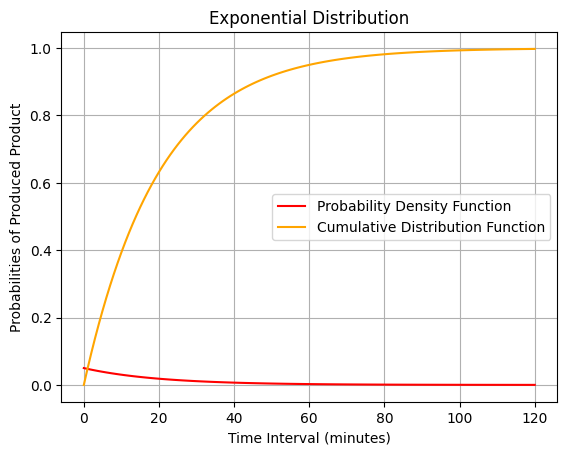

In [ ]:
# Input
Mp = 3 # mean of product

# Equation
def EdistPDF(num):
  return Mp * math.exp(-Mp * num)

def EdistCDF(num):
  return 1 - math.exp(-num / Mp)

# Theoretical PDF
x_2 = np.linspace(0, 2, 101)

y_2 = x_2 * 0

for i, item in enumerate(x_2):
  y_2[i] = EdistPDF(item)

x_2 *= 60 # converting time interval hour -> minutes
y_2 /= 60 # scaling

plt.plot(x_2, y_2, 'r', label = "Probability Density Function")


# Theoretical CDF
Mp = 60 / Mp
x_3 = np.linspace(0, int(x_2[-1]), int(x_2[-1]) + 1)

y_3 = x_3 * 0

for i, item in enumerate(x_3):
  y_3[i] = EdistCDF(item)

plt.plot(x_3, y_3, 'orange', label = "Cumulative Distribution Function")

# plotting
plt.xlabel("Time Interval (minutes)")
plt.ylabel("Probabilities of Produced Product")
plt.title("Exponential Distribution")
plt.legend()
plt.grid(True)

#### Key Components in the Code
1. Parameter Initialization:
  - Mp = 3: Mean time between events (before conversion to minutes).

2. Defining the Functions:
  - `EdistPDF(num)` calculates the PDF:
  $$EdistPDF(x) = Mp \cdot e^{-Mp \cdot x}
$$
  - `EdistCDF(num)` calculates the CDF:
  $$ F(x) = 1 - e^{-x / \lambda}
 $$

3. Theoretical PDF Calculation:
  - `x_2` is defined from 0 to 2 in 101 steps.
  - `y_2` is populated using `EdistPDF(x)`.
  - Conversion from hours to minutes:
    - `x_2` is multiplied by 60.
    - `y_2`is divided by 60 for scaling.

4. Theoretical CDF Calculation:
  - `x_3` is defined in minutes.
  - `y_3` is populated using `EdistCDF(x)`.

5. Plotting the Results:
  - The red curve represents the PDF (likelihood of an event occurring at a specific time).
  - The orange curve represents the CDF (probability that an event has occurred by time 𝑥).

#### Expected Output
- The PDF is a decreasing function, showing that shorter intervals are more probable.
- The CDF is an increasing function, approaching 1 as time increases.


---
# Weibull Distribution

### Cumulative Distribution Function
#### Overview
This code visualizes the Weibull distribution, commonly used for reliability analysis and failure modeling. The Weibull cumulative distribution function (CDF) represents the probability that a failure occurs by a certain time. The Weibull CDF is given by:
$$F(t) = 1 - e^{-(t / \lambda)^k}
$$
where:
- $k$ is the shape factor (determines the failure rate behavior).
- 𝜆 (`lamb`) is the characteristic life (scale parameter).
- 𝑡 represents time.

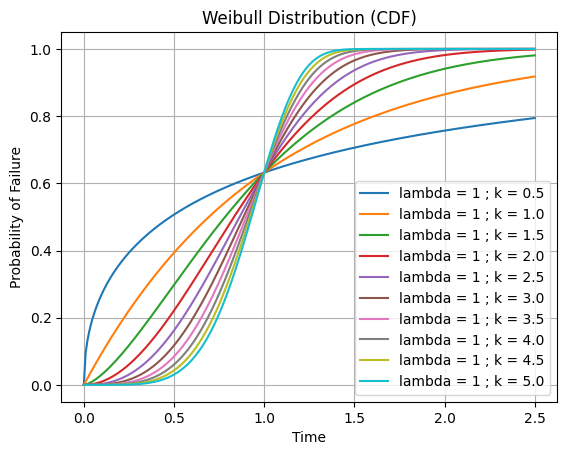

In [ ]:
k = 0 # shape factor
lamb = 1 # characteristic life

def WdistCDF(time):
  return 1 - math.exp(-(time / lamb) ** k)


x_1 = np.linspace(0, 2.5, 251)

y_1 = x_1 * 0

for i in range(10):
  k += 0.5

  for i, item in enumerate(x_1):
    y_1[i] = WdistCDF(item)

  plt.plot(x_1, y_1, label = f"lambda = {lamb} ; k = {k}")


# plotting
plt.xlabel("Time")
plt.ylabel("Probability of Failure")
plt.title("Weibull Distribution (CDF)")
plt.legend()
plt.grid(True)

#### Key Components in the Code
1. Parameter Initialization:
- `k = 0`: Initial shape factor (increases in steps of 0.5).
- `lamb = 1`: Characteristic life
(scale parameter).

2. Probability Density Function (PDF) Definition:
- The function `WdistCDF(time)` is defined as:
$$ WdistCDF(t) = 1 - e^{-(t / \lambda)^k}
 $$
- This function returns the probability that failure has occurred by time 𝑡.

3. Weibull CDF Calculation for Different Shape Factors:
  - `x_1` is defined from `0` to `2.5` in 251 steps.
  - The loop iterates over different values of `k` (from `0.5` to `5.0`).
  - `y_1` is computed using `WdistCDF(item)`, generating Weibull CDF curves for various k values.

4. Plotting the Results:
  - The x-axis represents time.
  - The y-axis represents the probability of failure up to that time.
  - Different curves correspond to different shape factors 𝑘.

#### Expected Output
- For $k<1$: The failure rate decreases over time (early-life failures).
- For $k=1$: The Weibull CDF behaves like an exponential CDF (constant failure rate).
- For $k>1$: The failure rate increases over time (wear-out failures).


### Probability Density Function
#### Overview
This code visualizes the Probability Density Function (PDF) of the Weibull distribution, which describes the likelihood of failure over time. The Weibull PDF is given by:
$$ f(t) = \frac{k}{\lambda} \left(\frac{t}{\lambda}\right)^{k-1} e^{-(t / \lambda)^k} $$
where:
- 𝑘 is the shape factor (determines the failure rate trend).
- 𝜆 (`lamb`) is the characteristic life (scale parameter).
- 𝑡 represents time.


<ipython-input-55-a1b197d0e7d7>:5: RuntimeWarning: divide by zero encountered in scalar power
  return (k / lamb) * ((time / lamb) ** (k - 1)) * math.exp(-(time / lamb) ** k)


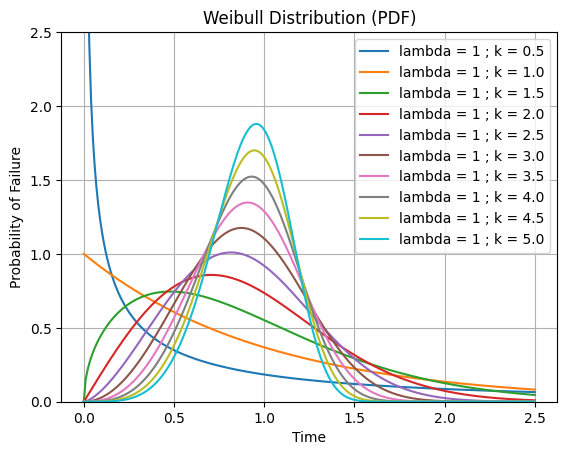

In [ ]:
k = 0 # shape factor
lamb = 1 # characteristic life

def WdistPDF(time):
  return (k / lamb) * ((time / lamb) ** (k - 1)) * math.exp(-(time / lamb) ** k)


x_1 = np.linspace(0, 2.5, 251)

y_1 = x_1 * 0

for i in range(10):
  k += 0.5

  for i, item in enumerate(x_1):
    y_1[i] = WdistPDF(item)

  plt.ylim(top = 2.5)
  plt.plot(x_1, y_1, label = f"lambda = {lamb} ; k = {k}")


# plotting
plt.xlabel("Time")
plt.ylabel("Probability of Failure")
plt.title("Weibull Distribution (PDF)")
plt.legend()
plt.grid(True)

#### Key Components in the Code
1. Parameter Initialization:
  - `k = 0`: Initial shape factor (increases in steps of 0.5).
  - `lamb = 1`: Characteristic life (scale parameter).

2. Probability Density Function (PDF) Definition:
  - The function WdistPDF(time) calculates the Weibull PDF:
  $$ WdistPDF(t) = \frac{k}{\lambda} \left(\frac{t}{\lambda}\right)^{k-1} e^{-(t / \lambda)^k}
 $$
  - This function represents the probability of failure at an exact time 𝑡.

3. Weibull PDF Calculation for Different Shape Factors:
  - `x_1` is defined from `0` to `2.5` in 251 steps.
  - The loop iterates over different values of `k` (from `0.5` to `5.0`).
  - `y_1` is computed using `WdistPDF(item)`, generating Weibull PDF curves for various `k` values.

4. Plotting the Results:
  - The x-axis represents time.
  - The y-axis represents the probability density of failure at a given time.
  - Different curves correspond to different shape factors 𝑘.

#### Expected Output
- For $k<1$: The distribution is skewed right, modeling early-life failures (high initial failure rate that decreases over time).
- For $k=1$: The Weibull PDF behaves like an exponential distribution (constant failure rate).
- For $k>1$: The failure rate increases over time (models wear-out failures).

### Simulation
#### Overview
This code simulates the Weibull distribution using a dataset of time-to-failure (TTF) values. It estimates the shape factor ($k$) and scale parameter ($\lambda$) using a linear regression approach and plots both the Cumulative Distribution Function (CDF) and Probability Density Function (PDF).

#### Key Equations
1. Cumulative Distribution Function (CDF):
$$F(t) = 1 - e^{-\left( \frac{t}{\lambda} \right)^k}$$
2. Probability Density Function (PDF):
$$f(t) = \frac{k}{\lambda} \left(\frac{t}{\lambda}\right)^{k-1} e^{-\left( \frac{t}{\lambda} \right)^k}$$
3. Estimating Shape Factor ($k$) and Scale Parameter ($\lambda$) using Regression:
  - The equation for $k$ (also known as beta) is determined by fitting a straight line to the transformed failure data.
  - The intercept of this line helps estimate $\lambda$ (also called eta).



beta (k) = 0.9363920836339962
eta (lambda) = 22.67899172022364


<ipython-input-61-5f0b5674cb0f>:29: RuntimeWarning: divide by zero encountered in scalar power
  return (k / lamb) * ((time / lamb) ** (k - 1)) * math.exp(-(time / lamb) ** k)


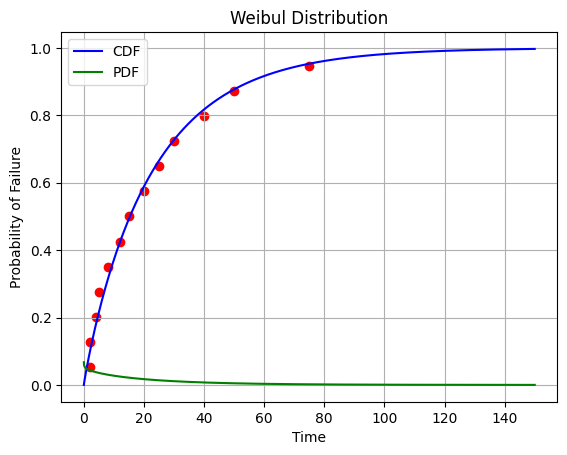

In [61]:
# FUNCTIONS
# function to calculate beta or k value and eta or lambda value
def calculate_beta_eta(dataset, median_rank):
  ln_ttf = [math.log(x) for x in dataset]
  linear_median_rank = [math.log(-math.log(1 - x)) for x in median_rank]

  x_mean = sum(ln_ttf) / len(ln_ttf)
  y_mean = sum(linear_median_rank) / len(linear_median_rank)

  sum1 = sum([(x - x_mean) * (y - y_mean) for (x, y) in zip(ln_ttf, linear_median_rank)])
  sum2 = sum([(x - x_mean) ** 2 for (x, y) in zip(ln_ttf, linear_median_rank)])

  beta = sum1 / sum2

  intercept = y_mean - beta * x_mean

  return beta, 1 / math.exp(intercept / beta)

def generate_median_rank(dataset):
  max_ind = len(dataset)
  return [(i + 1 - 0.3) / (max_ind + 0.4) for i in range(len(dataset))]

# Cumulative Distribution Function
def WdistCDF(time, lamb, k):
  return 1 - math.exp(-(time / lamb) ** k)

# probability density function
def WdistPDF(time, lamb, k):
  return (k / lamb) * ((time / lamb) ** (k - 1)) * math.exp(-(time / lamb) ** k)


# IMPLEMENTATION
# calculate values
dataset = [4, 2, 2, 5, 8, 12, 15, 20, 25, 30, 40, 50, 75] # dataset of "time to failure", in this case: days

dataset.sort()
N = len(dataset)

median_rank = generate_median_rank(dataset)
beta, eta = calculate_beta_eta(dataset, median_rank)
print(f"beta (k) = {beta}\neta (lambda) = {eta}")


# PLOTTING
# actual probability of dataset
x_actual = dataset
y_actual = median_rank
plt.scatter(x_actual, y_actual, color = "red")

# CDF
x_cdf = np.linspace(0, dataset[-1] * 2, dataset[-1] * 100 * 2 + 1)
y_cdf = [WdistCDF(x, eta, beta) for x in x_cdf]
plt.plot(x_cdf, y_cdf, color = "blue", label = "CDF")

# PDF
x_pdf = np.linspace(0, dataset[-1] * 2, dataset[-1] * 100 * 2 + 1)
y_pdf = [WdistPDF(x, eta, beta) for x in x_pdf]
plt.plot(x_pdf, y_pdf, color = "green", label = "PDF")

# plots
plt.xlabel("Time")
plt.ylabel("Probability of Failure")
plt.title("Weibul Distribution")
plt.legend()
plt.grid(True)

#### Key Components in the Code
1. Calculate Median Rank (Empirical Probability of Failure)
  - The median rank formula approximates the probability of failure for each observed failure time:
  $$R(i) = \frac{i - 0.3}{N + 0.4}
$$
  - This is implemented in `generate_median_rank(dataset)`.

2. Estimate Weibull Parameters ($k$, $λ$)
  - Convert failure times into their natural logarithm.
  - Convert median rank into double-log transformation.
  - Use linear regression to estimate $k$ and $\lambda$.
  - This is handled by `calculate_beta_eta(dataset, median_rank)`.

3. Compute Weibull CDF & PDF
  - `WdistCDF(time, lamb, k)` calculates the probability that failure has occurred by time $t$.
  - `WdistPDF(time, lamb, k)` calculates the probability density at time $t$.

4. Plot Weibull Distribution
  - Scatter plot of the actual dataset (red dots).
  - Theoretical CDF (blue curve).
  - Theoretical PDF (green curve).

#### Expected Output
- The red scatter points represent actual failure probabilities from the dataset.
- The blue line represents the estimated Weibull CDF (cumulative failure probability).
- The green line represents the Weibull PDF (failure rate at each time step).

#### Key Notes
- If $k=1$, the PDF Weibull distribution reduces to the Exponential Distribution.
- If $k=2$, the PDF Weibull distribution takes the form of the Rayleigh Distribution.
- The algorithm used to calculate $k$ (beta) is known as Bernard’s Approximation, which is why we generate median ranks before performing linear regression.


---
# **Comparison of Probability Distributions**  

1. **Normal Distribution**  
   - Defined over the interval ($-\infty, \infty$).  
   - A continuous distribution characterized by its mean ($\mu$) and standard deviation ($\sigma$).  
   - Forms a symmetric bell-shaped curve.  

2. **Binomial Distribution**  
   - Defined over a discrete interval $[a, b]$, where $a$ and $b$ are real numbers representing the possible number of successes.  
   - A discrete probability distribution that models the number of successes in $n$ independent trials, each with probability 4p$ of success.  

3. **Poisson Distribution**  
   - Defined over the interval $[a, \infty)$, where $a$ is a real number.  
   - A discrete probability distribution that models the number of occurrences of an event in a fixed interval of time or space.  

4. **Exponential Distribution**  
   - Similar to the Poisson distribution but differs in its parameters.  
   - A continuous probability distribution that models the time between occurrences of a Poisson process.  
   - Defined over the interval $[0, \infty)$.  

5. **Weibull Distribution**  
   - A generalization of the exponential distribution, defined over $[0, \infty)$.  
   - Characterized by two parameters:  
     - Shape parameter $k$ (beta), which controls the shape of the distribution.  
     - Scale parameter $\lambda$ (lambda), which determines the scale of the distribution.  
   - Special cases:  
     - When $k = 1$, the Weibull distribution reduces to the **Exponential Distribution**.  
     - When $k = 2$, it forms the **Rayleigh Distribution**.  
   - The estimation of $k$ (beta) is done using **Bernard’s Approximation**, requiring the calculation of median ranks.  

---
# **Conclusion**  
Each probability distribution serves a distinct purpose:  
- The **Normal distribution** is used for modeling continuous data that follows a symmetric bell curve.  
- The **Binomial distribution** is useful for discrete trials with two outcomes (success/failure).  
- The **Poisson and Exponential distributions** are related, with the Poisson modeling event counts and the Exponential modeling time between events.  
- The **Weibull distribution** is a flexible model for reliability analysis and failure time prediction.  